In [73]:
import random
import numpy as np
import timeit
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import pandas as pd
import time

In [7]:
random.randint(0,10) # random int between 1st and 2nd param, inclusive
random.randrange(-0,10,3) # number by "step" specified in 3rd param, between 1st and 2nd params
random.uniform(-10,10) # not a whole integer

1

In [23]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

[-2.6971311827281195,
 -16.327527477716664,
 41.39835656659386,
 85.64932281003611,
 -58.03129905790582,
 41.883409451553916,
 -67.74138515706312,
 17.88478905946503,
 17.09594919232849,
 81.26467269646774]

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [28]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [29]:
coordinates = list(lat_lngs)

In [38]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

chapais ca
greymouth nz
kamaishi jp
albany au
banjar id
butaritari ki
yulara au
malwan in
nizhneyansk ru
aykhal ru
kasungu mw
bluff nz
hofn is
palabuhanratu id
angoram pg
yar-sale ru
castro cl
kapaa us
ushuaia ar
primorsk ru
avarua ck
ushuaia ar
punta arenas cl
porto santo pt
bredasdorp za
bredasdorp za
rikitea pf
avarua ck
sentyabrskiy ru
hermanus za
rikitea pf
blackpool gb
kontagora ng
vaitupu wf
vaitupu wf
nizhneyansk ru
sartana ua
lazaro cardenas mx
bluff nz
hilo us
hermanus za
karaul ru
longyearbyen sj
llangefni gb
nguiu au
nikolskoye ru
clyde river ca
yumen cn
hobart au
taolanaro mg
puteyets ru
rikitea pf
bilibino ru
mys shmidta ru
ponta do sol cv
cape town za
beyneu kz
busselton au
luderitz na
saint-sauveur-des-monts ca
ushuaia ar
hilo us
ciudad bolivar ve
salalah om
clyde river ca
yuli tw
nikolskoye ru
ushuaia ar
tuktoyaktuk ca
los llanos de aridane es
kuching my
dingle ie
avarua ck
constitucion mx
rikitea pf
evensk ru
kichera ru
busselton au
chuy uy
altagracia de orituco ve
ta

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [56]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
boston_data = city_weather.json()
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [63]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-31 20:54:21'

In [65]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ng Record 33 of Set 4 | portree
Processing Record 34 of Set 4 | buariki
City not found. Skipping...
Processing Record 35 of Set 4 | oyama
Processing Record 36 of Set 4 | cherskiy
Processing Record 37 of Set 4 | melfi
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 40 of Set 4 | port augusta
Processing Record 41 of Set 4 | tongliao
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | sao miguel do araguaia
Processing Record 44 of Set 4 | barcelona
Processing Record 45 of Set 4 | pahrump
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | boyuibe
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | filimonovo
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | nao-me-toque
City not found. Skipping...
Processing Record 2 of Set 5 | kirkuk
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 

In [68]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,3.20,72,1,3.44,CA,2021-01-31 21:05:30
1,Greymouth,-42.4667,171.2000,61.16,64,50,1.86,NZ,2021-01-31 21:05:30
2,Kamaishi,39.2667,141.8833,26.62,89,89,5.35,JP,2021-01-31 21:05:30
3,Albany,42.6001,-73.9662,19.00,46,100,2.28,US,2021-01-31 21:05:30
4,Banjar,-8.1900,114.9675,80.60,89,20,4.61,ID,2021-01-31 21:05:30
5,Butaritari,3.0707,172.7902,80.40,83,39,15.10,KI,2021-01-31 21:05:30
6,Yulara,-25.2406,130.9889,84.20,21,98,10.36,AU,2021-01-31 21:01:16
7,Aykhal,66.0000,111.5000,-40.13,79,100,9.62,RU,2021-01-31 21:05:31
8,Kasungu,-13.0333,33.4833,65.97,95,100,4.38,MW,2021-01-31 21:05:31
9,Bluff,-46.6000,168.3333,58.53,75,49,2.62,NZ,2021-01-31 21:05:31


In [70]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chapais,CA,2021-01-31 21:05:30,49.7834,-74.8492,3.20,72,1,3.44
1,Greymouth,NZ,2021-01-31 21:05:30,-42.4667,171.2000,61.16,64,50,1.86
2,Kamaishi,JP,2021-01-31 21:05:30,39.2667,141.8833,26.62,89,89,5.35
3,Albany,US,2021-01-31 21:05:30,42.6001,-73.9662,19.00,46,100,2.28
4,Banjar,ID,2021-01-31 21:05:30,-8.1900,114.9675,80.60,89,20,4.61
5,Butaritari,KI,2021-01-31 21:05:30,3.0707,172.7902,80.40,83,39,15.10
6,Yulara,AU,2021-01-31 21:01:16,-25.2406,130.9889,84.20,21,98,10.36
7,Aykhal,RU,2021-01-31 21:05:31,66.0000,111.5000,-40.13,79,100,9.62
8,Kasungu,MW,2021-01-31 21:05:31,-13.0333,33.4833,65.97,95,100,4.38
9,Bluff,NZ,2021-01-31 21:05:31,-46.6000,168.3333,58.53,75,49,2.62


In [71]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [76]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/31/21'

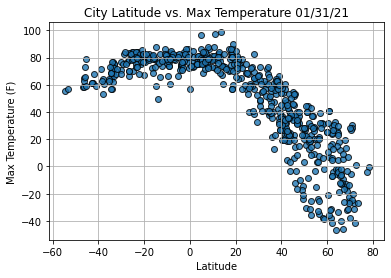

In [77]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()